In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency
from itertools import combinations
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Loading the dataset
data = pd.read_csv("C:/Users/Dell/Desktop/Applied ML/Project/Mental_Health_Care_in_the_Last_4_Weeks.csv")
data.info

<bound method DataFrame.info of                                                Indicator              Group  \
0      Took Prescription Medication for Mental Health...  National Estimate   
1      Took Prescription Medication for Mental Health...             By Age   
2      Took Prescription Medication for Mental Health...             By Age   
3      Took Prescription Medication for Mental Health...             By Age   
4      Took Prescription Medication for Mental Health...             By Age   
...                                                  ...                ...   
10399  Needed Counseling or Therapy But Did Not Get I...           By State   
10400  Needed Counseling or Therapy But Did Not Get I...           By State   
10401  Needed Counseling or Therapy But Did Not Get I...           By State   
10402  Needed Counseling or Therapy But Did Not Get I...           By State   
10403  Needed Counseling or Therapy But Did Not Get I...           By State   

               Stat

In [4]:
data.head()

Indicator              Group  \
0  Took Prescription Medication for Mental Health...  National Estimate   
1  Took Prescription Medication for Mental Health...             By Age   
2  Took Prescription Medication for Mental Health...             By Age   
3  Took Prescription Medication for Mental Health...             By Age   
4  Took Prescription Medication for Mental Health...             By Age   

           State       Subgroup Phase  Time Period      Time Period Label  \
0  United States  United States     2           13  Aug 19 - Aug 31, 2020   
1  United States  18 - 29 years     2           13  Aug 19 - Aug 31, 2020   
2  United States  30 - 39 years     2           13  Aug 19 - Aug 31, 2020   
3  United States  40 - 49 years     2           13  Aug 19 - Aug 31, 2020   
4  United States  50 - 59 years     2           13  Aug 19 - Aug 31, 2020   

  Time Period Start Date Time Period End Date  Value  LowCI  HighCI  \
0             08/19/2020           08/31/2020   19.4   19.0    19.8   
1             08/19/2020           08/31/2020   18.7   17.2    20.3   
2             08/19/2020           08/31/2020   18.3   17.3    19.2   
3             08/19/2020           08/31/2020   20.4   19.5    21.3   
4             08/19/2020           08/31/2020   21.2   20.2    22.2   

  Confidence Interval Quartile Range  Suppression Flag  
0         19.0 - 19.8            NaN               NaN  
1         17.2 - 20.3            NaN               NaN  
2         17.3 - 19.2            NaN               NaN  
3         19.5 - 21.3            NaN               NaN  
4         20.2 - 22.2            NaN               NaN

In [5]:
# To check the NaN values 
print(data.isna().sum())

Indicator                     0
Group                         0
State                         0
Subgroup                      0
Phase                         0
Time Period                   0
Time Period Label             0
Time Period Start Date        0
Time Period End Date          0
Value                       490
LowCI                       490
HighCI                      490
Confidence Interval         490
Quartile Range             3672
Suppression Flag          10382
dtype: int64


In [6]:
data.describe()

Time Period        Value        LowCI       HighCI  Suppression Flag
count  10404.000000  9914.000000  9914.000000  9914.000000              22.0
mean      28.134948    17.450736    14.771565    20.475661               1.0
std       11.040210     8.270565     7.659396     9.052521               0.0
min        1.000000     1.400000     0.800000     2.000000               1.0
25%       20.000000    10.300000     8.000000    12.900000               1.0
50%       29.000000    16.200000    13.900000    19.200000               1.0
75%       37.000000    24.000000    20.800000    27.400000               1.0
max       45.000000    62.900000    53.200000    71.900000               1.0

In [7]:
data.duplicated().sum()

0

In [8]:
data['Value'].fillna(data['Value'].mean(), inplace=True)
data['LowCI'].fillna(data['LowCI'].mean(), inplace=True)
data['HighCI'].fillna(data['HighCI'].mean(), inplace=True)

In [9]:
data['Quartile Range'].fillna(data['Quartile Range'].mode()[0], inplace=True)
data['Confidence Interval'] = data['LowCI'].astype(str) + " - " + data['HighCI'].astype(str)

In [10]:
data.drop(columns=['Suppression Flag'], inplace=True)

In [11]:
# To check the NaN values 
print(data.isna().sum())

Indicator                 0
Group                     0
State                     0
Subgroup                  0
Phase                     0
Time Period               0
Time Period Label         0
Time Period Start Date    0
Time Period End Date      0
Value                     0
LowCI                     0
HighCI                    0
Confidence Interval       0
Quartile Range            0
dtype: int64


In [12]:
data.head()

Indicator              Group  \
0  Took Prescription Medication for Mental Health...  National Estimate   
1  Took Prescription Medication for Mental Health...             By Age   
2  Took Prescription Medication for Mental Health...             By Age   
3  Took Prescription Medication for Mental Health...             By Age   
4  Took Prescription Medication for Mental Health...             By Age   

           State       Subgroup Phase  Time Period      Time Period Label  \
0  United States  United States     2           13  Aug 19 - Aug 31, 2020   
1  United States  18 - 29 years     2           13  Aug 19 - Aug 31, 2020   
2  United States  30 - 39 years     2           13  Aug 19 - Aug 31, 2020   
3  United States  40 - 49 years     2           13  Aug 19 - Aug 31, 2020   
4  United States  50 - 59 years     2           13  Aug 19 - Aug 31, 2020   

  Time Period Start Date Time Period End Date  Value  LowCI  HighCI  \
0             08/19/2020           08/31/2020   19.4   19.0    19.8   
1             08/19/2020           08/31/2020   18.7   17.2    20.3   
2             08/19/2020           08/31/2020   18.3   17.3    19.2   
3             08/19/2020           08/31/2020   20.4   19.5    21.3   
4             08/19/2020           08/31/2020   21.2   20.2    22.2   

  Confidence Interval Quartile Range  
0         19.0 - 19.8       9.8-11.2  
1         17.2 - 20.3       9.8-11.2  
2         17.3 - 19.2       9.8-11.2  
3         19.5 - 21.3       9.8-11.2  
4         20.2 - 22.2       9.8-11.2

In [13]:
# Creating the list of categorical and numerical columns
# Categorical variables:
cat_cols = data.select_dtypes(include = ['object', 'category']).columns.to_list()
print("Categorical Columns: ",cat_cols)

# Numerical variables:
num_cols = data.select_dtypes(include = ['float', 'int']).columns.to_list()
print("Numerical Columns: ",num_cols)

Categorical Columns:  ['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period Label', 'Time Period Start Date', 'Time Period End Date', 'Confidence Interval', 'Quartile Range']
Numerical Columns:  ['Time Period', 'Value', 'LowCI', 'HighCI']


C:\Users\Dell\AppData\Local\Temp\ipykernel_22644\3099144994.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


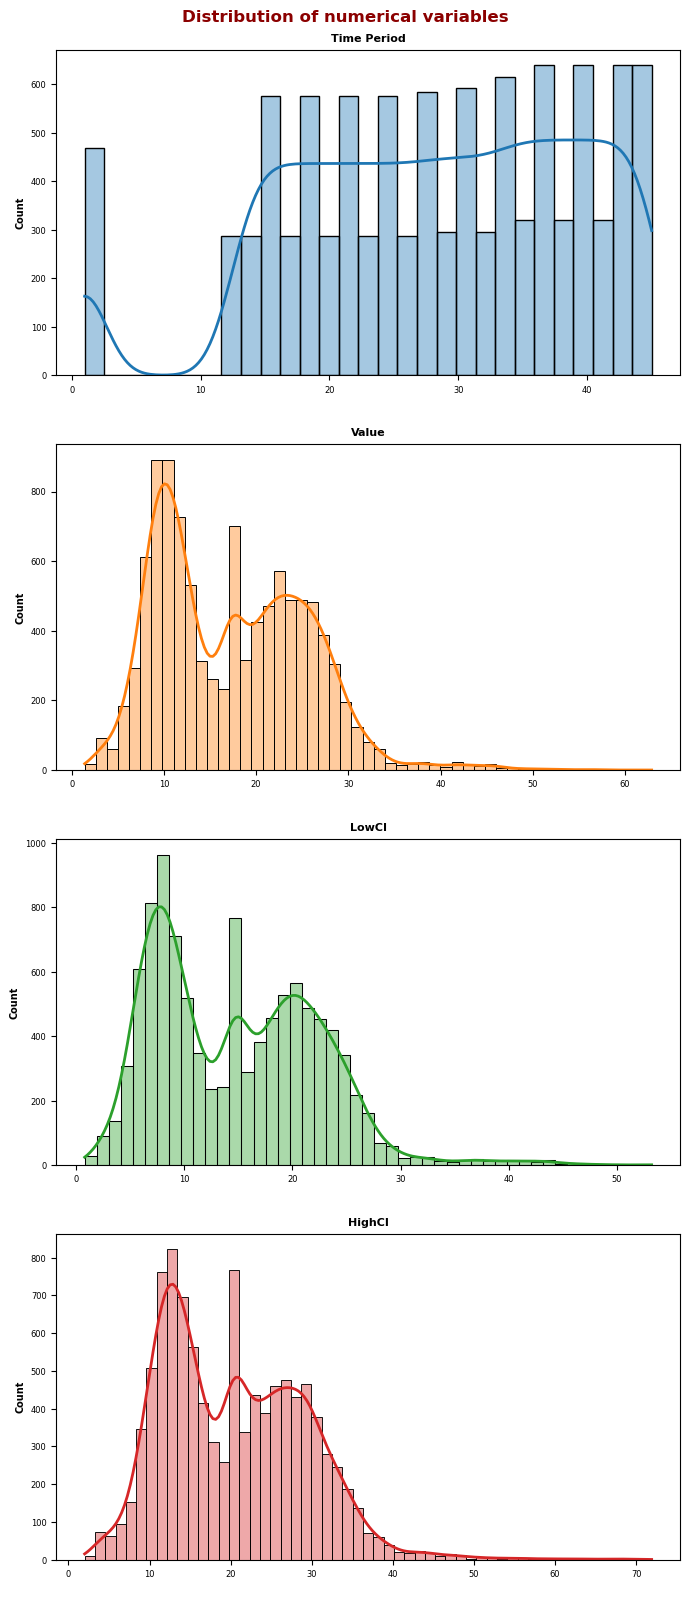

In [14]:
# Plotting the Numerical columns
fig,axes = plt.subplots(5, 1, figsize = (7, 20))
axes = axes.flat

for i, num_col in enumerate(num_cols):
  sns.histplot(data,
               x = num_col,
               stat = 'count',
               kde = True,
               color = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
               line_kws = {'linewidth': 2},
               alpha = 0.4,
               ax = axes[i])

  axes[i].set_xlabel(" ")
  axes[i].set_ylabel("Count", fontsize = 7, fontweight = 'bold', color = 'black')
  axes[i].set_title(num_col, fontsize = 8, fontweight = 'bold', color = 'black')
  axes[i].tick_params(labelsize = 6)


fig.delaxes(axes[4])
fig.suptitle('Distribution of numerical variables', fontsize = 12, fontweight = 'bold', color = 'darkred')
fig.tight_layout()
fig.subplots_adjust(top = 0.96)
fig.show()

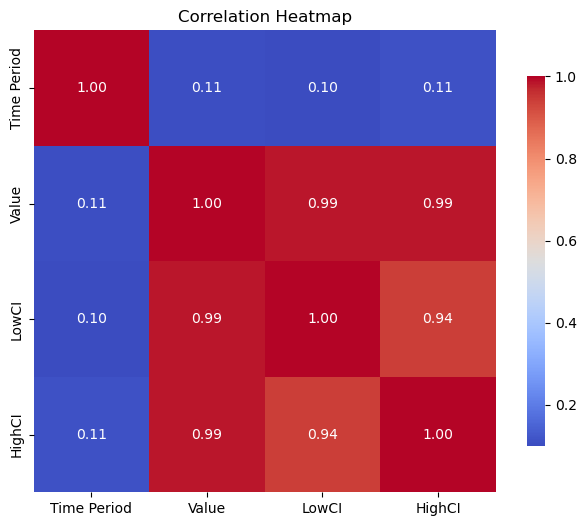

In [15]:
# Calculate correlation matrix
numerical_cols = data[['Time Period', 'Value', 'LowCI', 'HighCI']]
correlation_matrix = numerical_cols.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

In [16]:
# Find unique values in the Categorical columns
unique_indicator = data['Indicator'].unique()
print("Unique Indicator:", unique_indicator)
unique_group = data['Group'].unique()
print("Unique Group:", unique_group)
unique_state = data['State'].unique()
print("Unique State:", unique_state)
unique_subgroups = data['Subgroup'].unique()
print("Unique Subgroups:", unique_subgroups)
unique_phase = data['Phase'].unique()
print("Unique Phase:", unique_phase)
unique_ci = data['Confidence Interval'].unique()
print("Unique Confidence Interval:", unique_ci)
unique_qr = data['Quartile Range'].unique()
print("Unique Quartile Range:", unique_qr)

Unique Indicator: ['Took Prescription Medication for Mental Health, Last 4 Weeks'
 'Received Counseling or Therapy, Last 4 Weeks'
 'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks'
 'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks']
Unique Group: ['National Estimate' 'By Age' 'By Sex'
 'By Presence of Symptoms of Anxiety/Depression'
 'By Race/Hispanic ethnicity' 'By Education' 'By State'
 'By Disability status' 'By Gender identity' 'By Sexual orientation']
Unique State: ['United States' 'Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'District of Columbia' 'Florida'
 'Georgia' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas'
 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada'
 'New Hampshire' 'New Jersey' 'New Mexico' 'New York' 'North Carolina'
 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pe

In [17]:
# Identify categorical columns
cat_cols = data.select_dtypes(include=['object', 'category']).columns
print(cat_cols)

# Applying Chi-squared test on each pair of categorical columns
results = []

for col1, col2 in combinations(cat_cols, 2):
    # Create contingency table
    contingency_table = pd.crosstab(data[col1], data[col2])

    # Apply Chi-squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Store the result
    results.append({
        'Variable 1': col1,
        'Variable 2': col2,
        'Chi-squared Statistic': chi2,
        'p-value': p,
        'Degrees of Freedom': dof
    })

# Converting results to a DataFrame
chi_squared_results = pd.DataFrame(results)

# Filter for significant results 
alpha = 0.05
significant_results = chi_squared_results[chi_squared_results['p-value'] < alpha]

# Printing significant associations
print("Significant Chi-squared test results (p < 0.05):")
print(significant_results)

Index(['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period Label',
       'Time Period Start Date', 'Time Period End Date', 'Confidence Interval',
       'Quartile Range'],
      dtype='object')
Significant Chi-squared test results (p < 0.05):
                Variable 1              Variable 2  Chi-squared Statistic  \
7                Indicator     Confidence Interval           2.535727e+04   
8                Indicator          Quartile Range           1.960501e+04   
9                    Group                   State           1.040400e+04   
10                   Group                Subgroup           9.363600e+04   
11                   Group                   Phase           1.482801e+03   
12                   Group       Time Period Label           1.668711e+03   
13                   Group  Time Period Start Date           1.668711e+03   
14                   Group    Time Period End Date           1.668711e+03   
15                   Group     Confidence Interval

In [ ]:
#pip install sweetviz

In [ ]:
import sweetviz as sv

# Create a report
report = sv.analyze(data)

# Show the report
report.show_html("sweetviz_report.html")


In [18]:
# Inspect unique values in Group and Subgroup
print("Unique values in Group:\n", data['Group'].unique())
print("\nUnique values in Subgroup:\n", data['Subgroup'].unique())

# Cross-tabulate Group and Subgroup
group_subgroup_relation = pd.crosstab(data['Group'], data['Subgroup'])
print("\nGroup-Subgroup Relationship:\n", group_subgroup_relation)

Unique values in Group:
 ['National Estimate' 'By Age' 'By Sex'
 'By Presence of Symptoms of Anxiety/Depression'
 'By Race/Hispanic ethnicity' 'By Education' 'By State'
 'By Disability status' 'By Gender identity' 'By Sexual orientation']

Unique values in Subgroup:
 ['United States' '18 - 29 years' '30 - 39 years' '40 - 49 years'
 '50 - 59 years' '60 - 69 years' '70 - 79 years' '80 years and above'
 'Male' 'Female'
 'Did not experience symptoms of anxiety/depression in the past 4 weeks'
 'Experienced symptoms of anxiety/depression in past 4 weeks'
 'Hispanic or Latino' 'Non-Hispanic White, single race'
 'Non-Hispanic Black, single race' 'Non-Hispanic Asian, single race'
 'Non-Hispanic, other races and multiple races'
 'Less than a high school diploma' 'High school diploma or GED'
 "Some college/Associate's degree" "Bachelor's degree or higher" 'Alabama'
 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado' 'Connecticut'
 'Delaware' 'District of Columbia' 'Florida' 'Georgia' 'Hawaii' 

In [19]:
# Check class balance for 'Subgroup' (demographic subgroup)
subgroup_counts = data['Subgroup'].value_counts()
print("Subgroup Class Balance:\n", subgroup_counts)

Subgroup Class Balance:
 Subgroup
United States                                                 152
Experienced symptoms of anxiety/depression in past 4 weeks    152
18 - 29 years                                                 152
Bachelor's degree or higher                                   152
Some college/Associate's degree                               152
                                                             ... 
Cis-gender female                                              52
Transgender                                                    52
Gay or lesbian                                                 52
Straight                                                       52
Bisexual                                                       52
Name: count, Length: 80, dtype: int64


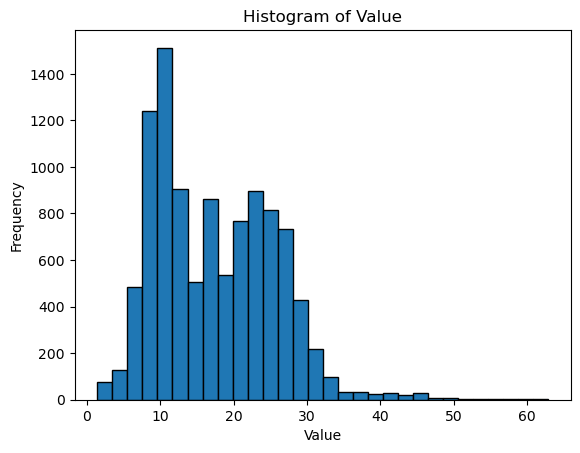

In [20]:
# Plot histogram for checking distribution of data
plt.hist(data['Value'], bins=30, edgecolor='black')
plt.title('Histogram of Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [21]:
from scipy.stats import shapiro

# Shapiro-Wilk test for normality
stat, p_value = shapiro(data['Value'])
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-value: {p_value}")

# If p-value < 0.05, the data is not normally distributed
if p_value < 0.05:
    print("The data is not normally distributed.")
else:
    print("The data is normally distributed.")

Shapiro-Wilk Test Statistic: 0.9527092653778821
P-value: 2.1325044174466455e-49
The data is not normally distributed.


C:\Users\Dell\AppData\Local\Temp\ipykernel_22644\690761128.py:4: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10404.
  stat, p_value = shapiro(data['Value'])


In [22]:
# Defining the Usage_Category column on basis of Value column using Qunatile binning
from sklearn.preprocessing import KBinsDiscretizer
# Initialize the KBinsDiscretizer with quantile strategy
# Set n_bins to the number of desired bins (e.g., 5 or 10)
num_bins = 3
bin_labels = ['Low', 'Medium', 'High']

# Step 2: Apply quantile binning
data['Usage_Category'] = pd.qcut(data['Value'], q=num_bins, labels=bin_labels)

# Step 3: Verify the distribution of the new Usage_Category column
print("Usage Category Distribution After Quantile Binning:\n", data['Usage_Category'].value_counts())
print("\nBinned Data with Usage_Category:\n", data[['Value', 'Usage_Category']])

Usage Category Distribution After Quantile Binning:
 Usage_Category
Low       3495
High      3464
Medium    3445
Name: count, dtype: int64

Binned Data with Usage_Category:
        Value Usage_Category
0       19.4         Medium
1       18.7         Medium
2       18.3         Medium
3       20.4         Medium
4       21.2         Medium
...      ...            ...
10399   10.1            Low
10400   14.8         Medium
10401    9.8            Low
10402   11.6            Low
10403   11.5            Low

[10404 rows x 2 columns]


In [23]:
# Check class balance for 'Usage_Category'
usage_category_counts = data['Usage_Category'].value_counts()
print("Usage Category Class Balance:\n", usage_category_counts)

Usage Category Class Balance:
 Usage_Category
Low       3495
High      3464
Medium    3445
Name: count, dtype: int64


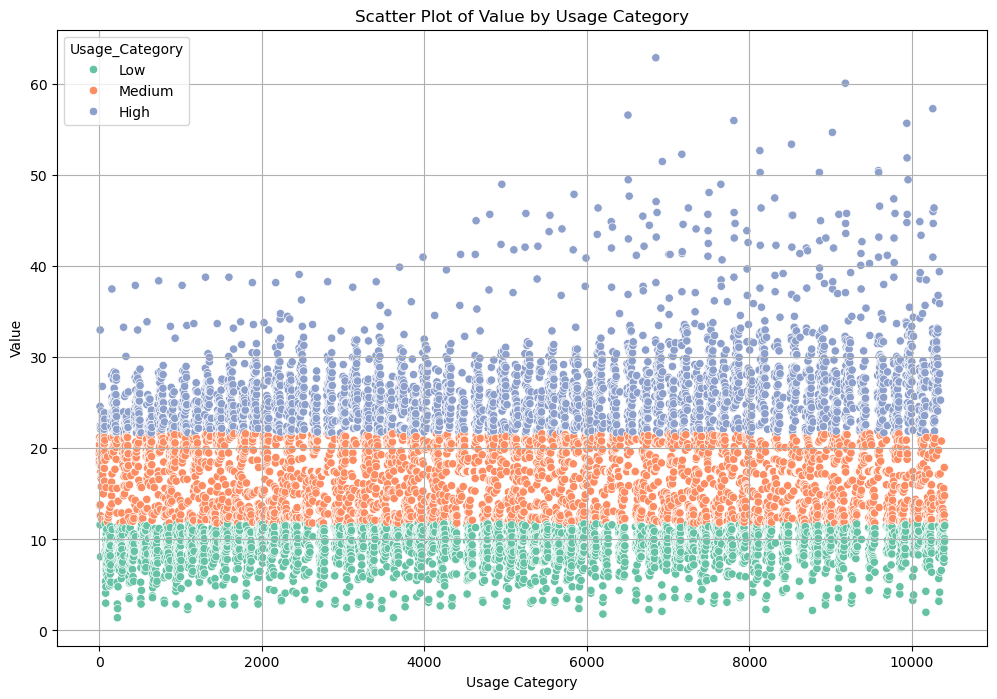

In [24]:
# Scatter Plot
plt.figure(figsize=(12, 8))
#sns.scatterplot(x='Usage_Category', y='Value', data=data, s=100, color='g')
sns.scatterplot(x=data.index, y='Value', hue='Usage_Category', data=data, palette='Set2')
plt.title("Scatter Plot of Value by Usage Category")
plt.xlabel("Usage Category")
plt.ylabel("Value")
plt.grid(True)
plt.show()

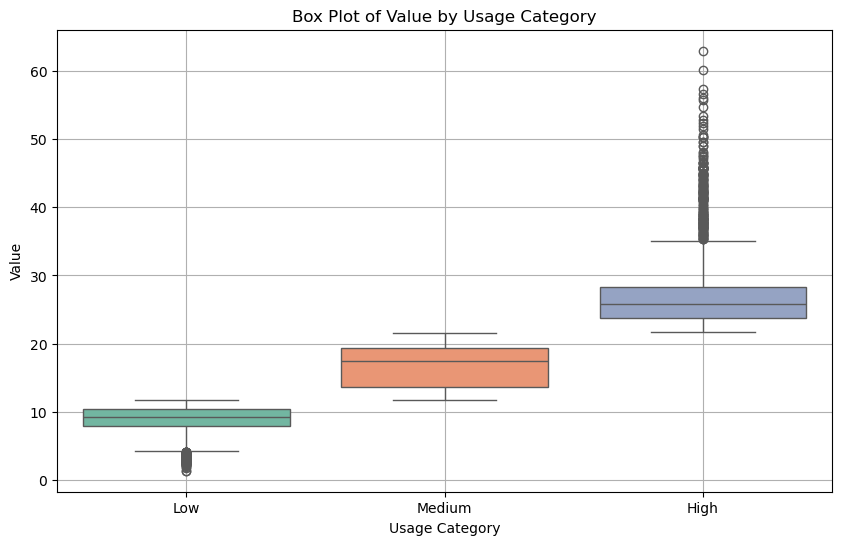

In [57]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Usage_Category', y='Value', data=data, palette="Set2")
plt.title("Box Plot of Value by Usage Category")
plt.xlabel("Usage Category")
plt.ylabel("Value")
plt.grid(True)
plt.show()

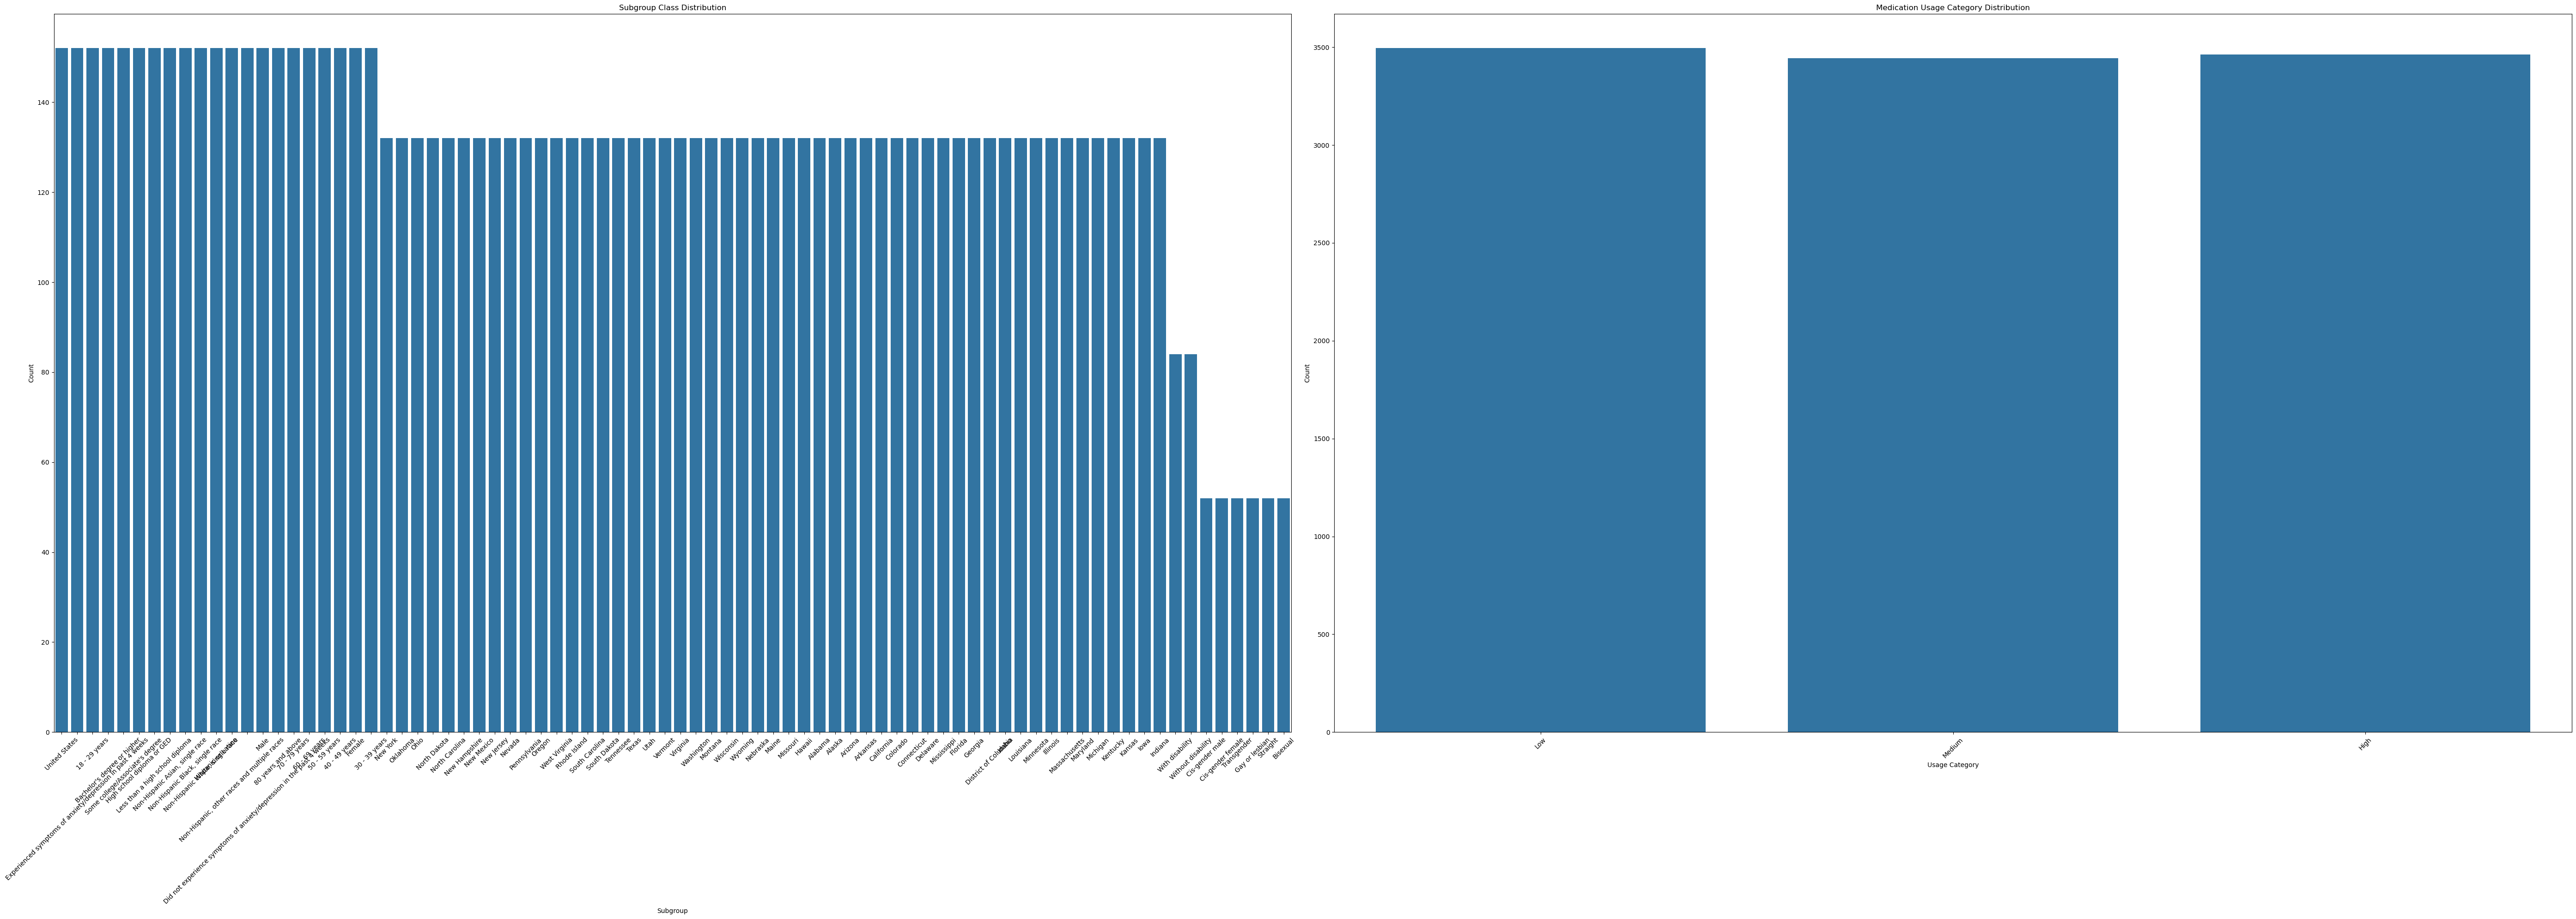

In [33]:
# Visualize the distributions
fig, axes = plt.subplots(1, 2, figsize=(56, 20))
sns.barplot(x=subgroup_counts.index, y=subgroup_counts.values, ax=axes[0])
axes[0].set_title('Subgroup Class Distribution')
axes[0].set_xlabel('Subgroup')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x=usage_category_counts.index, y=usage_category_counts.values, ax=axes[1])
axes[1].set_title('Medication Usage Category Distribution')
axes[1].set_xlabel('Usage Category')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_22644\3840079054.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportions = data.groupby(['Subgroup', 'Usage_Category']).size().unstack(fill_value=0)


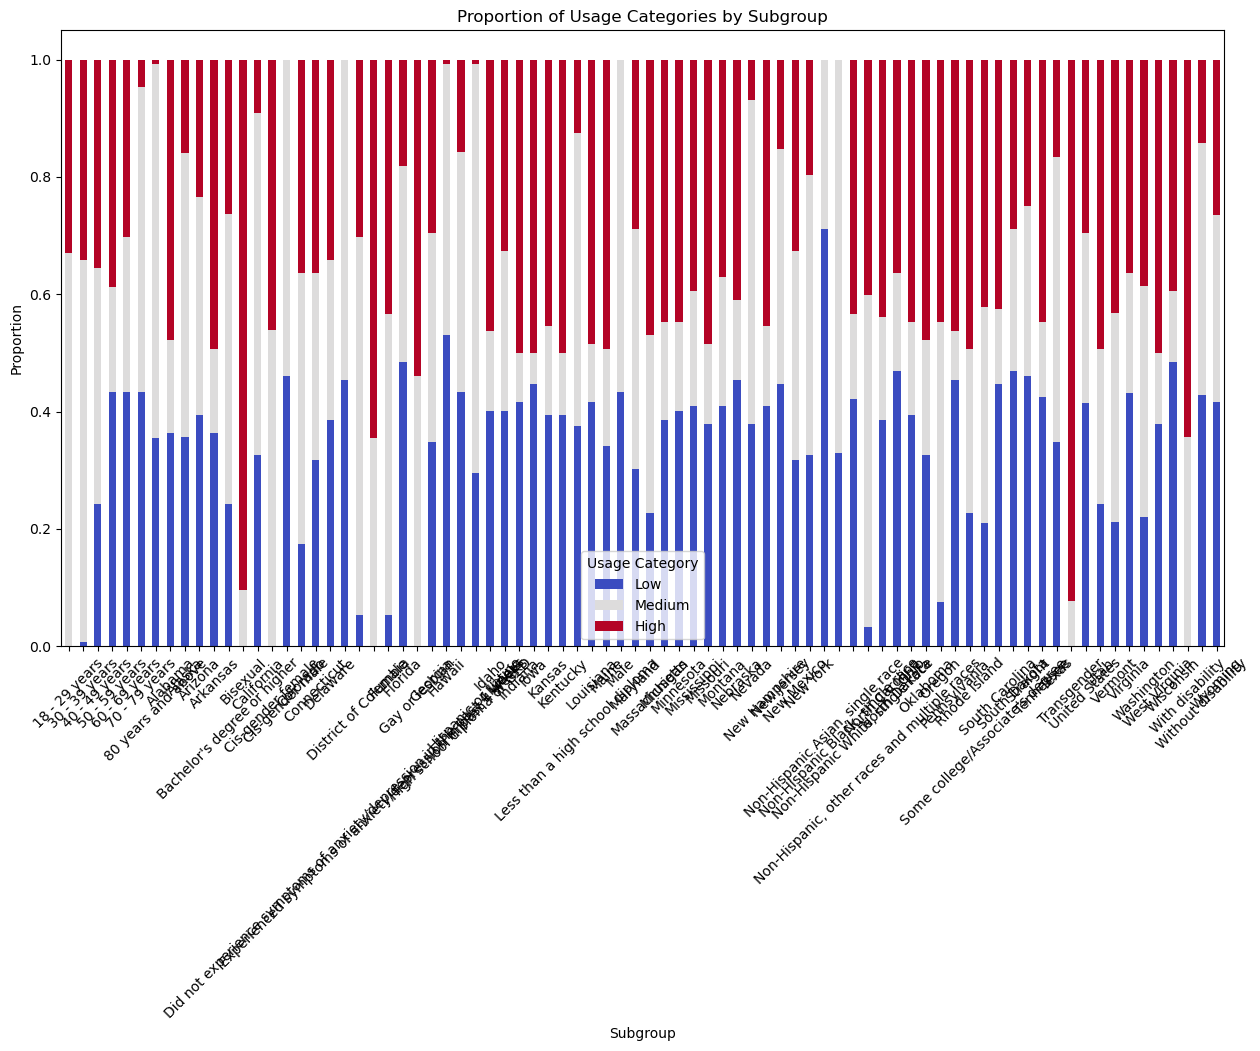

In [49]:
# Calculate proportions
proportions = data.groupby(['Subgroup', 'Usage_Category']).size().unstack(fill_value=0)
proportions = proportions.div(proportions.sum(axis=1), axis=0)  # Convert to proportions

# Plot stacked bar chart
proportions.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='coolwarm')
plt.title('Proportion of Usage Categories by Subgroup')
plt.xlabel('Subgroup')
plt.ylabel('Proportion')
plt.legend(title='Usage Category')
plt.xticks(rotation=45)
plt.show()

In [50]:
import plotly.express as px

# Interactive bar chart
fig = px.bar(category_counts, x='Subgroup', y='Count', color='Usage_Category',
             title='Medication Usage Categories by Subgroup')
fig.update_layout(xaxis_tickangle=45)
fig.show()

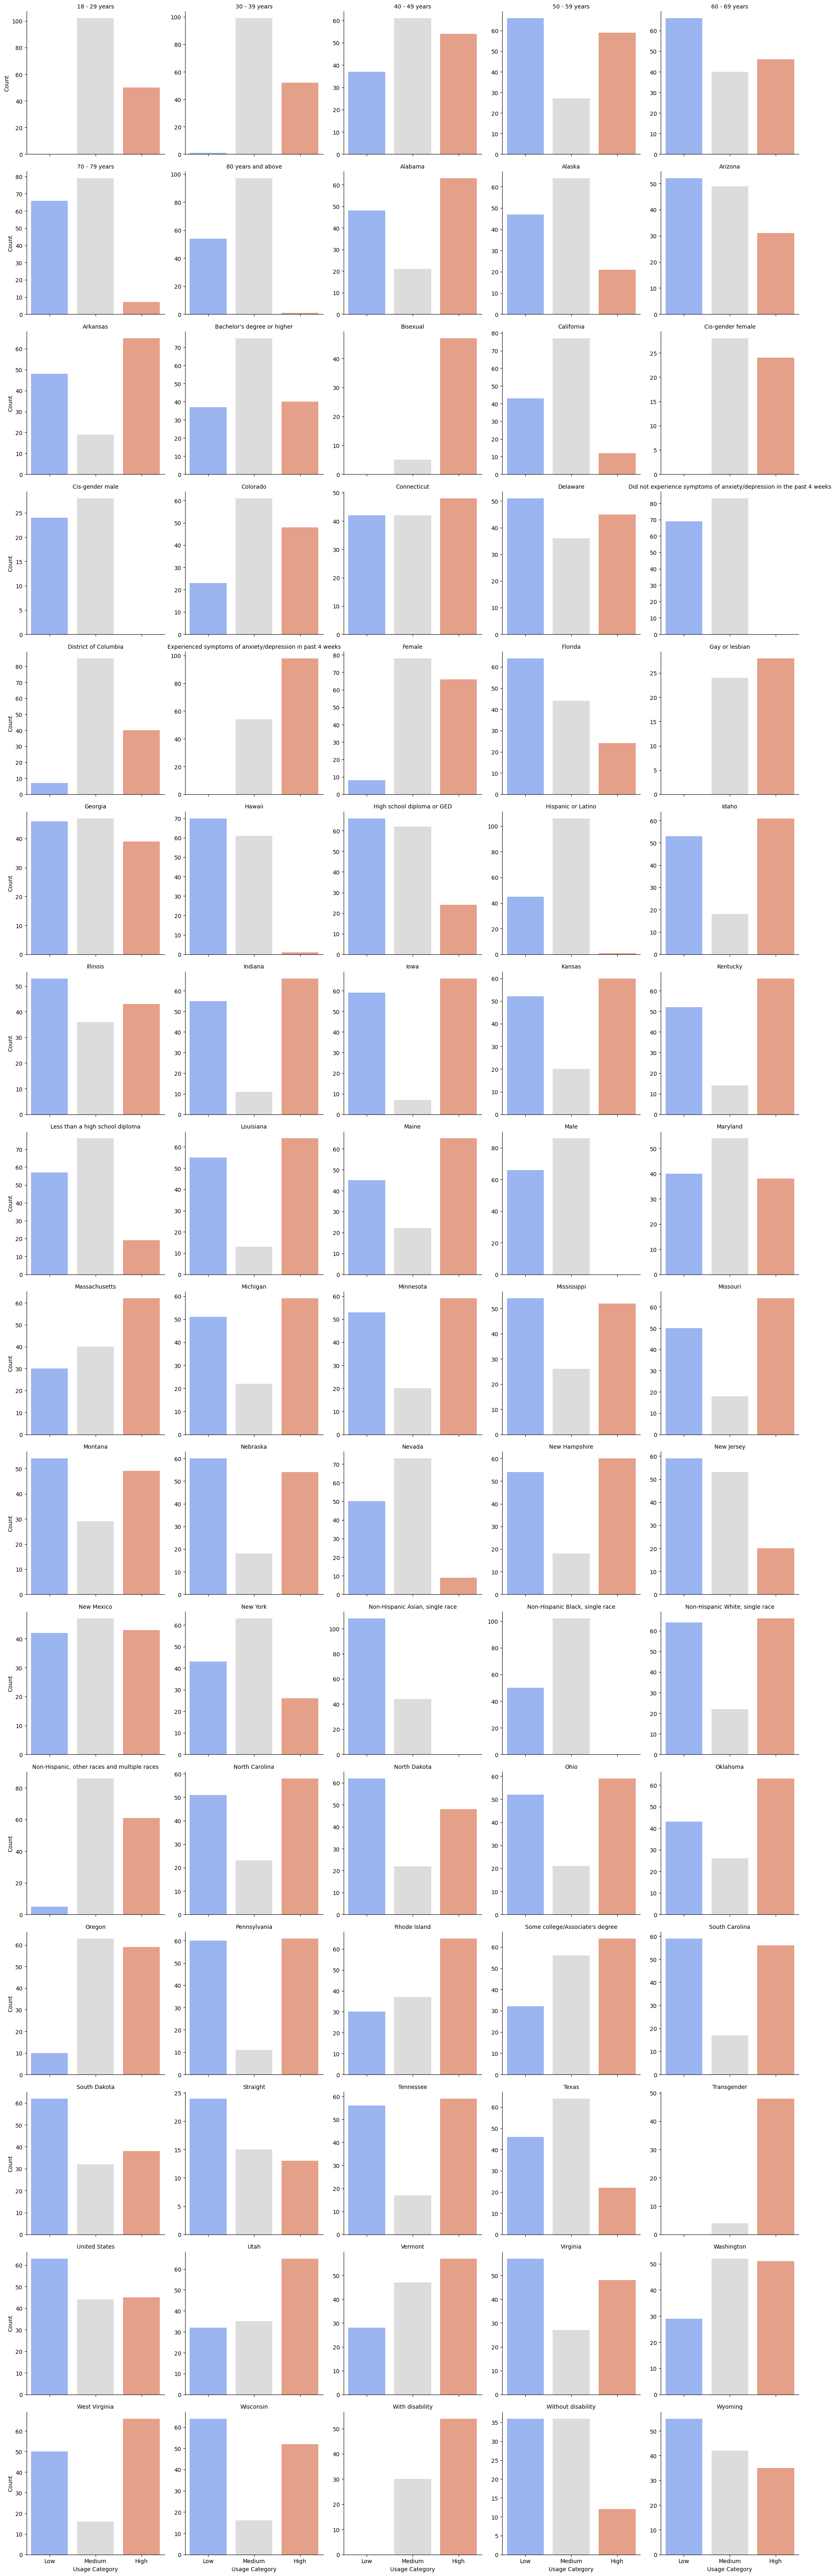

In [58]:
# Group by Subgroup and Usage_Category and calculate counts
category_counts = data.groupby(['Subgroup', 'Usage_Category']).size().reset_index(name='Count')

# Use the dataframe with counts
g = sns.FacetGrid(category_counts, col="Subgroup", col_wrap=5, height=4, sharey=False)
g.map(sns.barplot, "Usage_Category", "Count", order=["Low", "Medium", "High"], palette="coolwarm")

# Set titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("Usage Category", "Count")
plt.show()

In [34]:
# Check class balance for 'Demographic_Profile'
group_counts = data['Group'].value_counts()
print("Group Class Balance:\n", group_counts)

Group Class Balance:
 Group
By State                                         6732
By Age                                           1064
By Race/Hispanic ethnicity                        760
By Education                                      608
By Sex                                            304
By Presence of Symptoms of Anxiety/Depression     304
By Disability status                              168
By Gender identity                                156
By Sexual orientation                             156
National Estimate                                 152
Name: count, dtype: int64


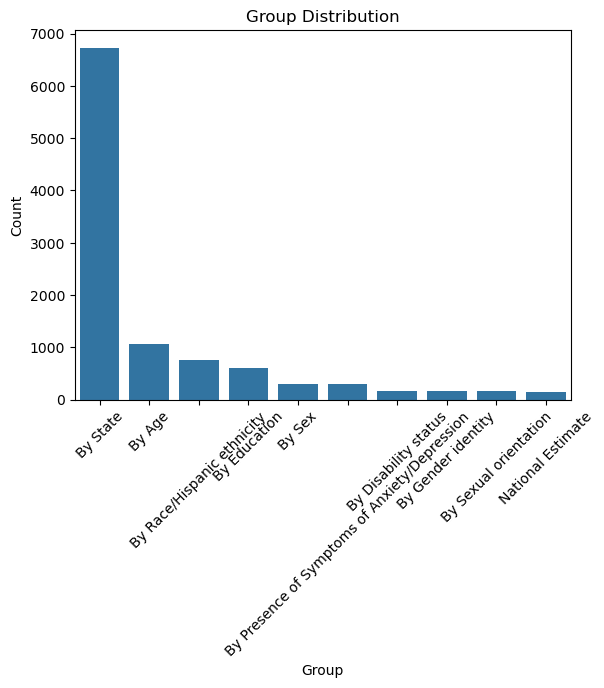

In [35]:
# Visualize the class distribution
sns.barplot(x=group_counts.index, y=group_counts.values)
plt.title('Group Distribution')
plt.xlabel('Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [36]:
# On the basis of the above found association between the columns

# Dropping the columns "Time Period Start Date", "Time Period End Date" and Confidence Interval 
data_reduced = data.drop(columns=["Time Period Start Date", "Time Period End Date", "Confidence Interval"])
print(data_reduced.columns)

Index(['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period',
       'Time Period Label', 'Value', 'LowCI', 'HighCI', 'Quartile Range',
       'Usage_Category'],
      dtype='object')


In [37]:
data_reduced.head()

Indicator              Group  \
0  Took Prescription Medication for Mental Health...  National Estimate   
1  Took Prescription Medication for Mental Health...             By Age   
2  Took Prescription Medication for Mental Health...             By Age   
3  Took Prescription Medication for Mental Health...             By Age   
4  Took Prescription Medication for Mental Health...             By Age   

           State       Subgroup Phase  Time Period      Time Period Label  \
0  United States  United States     2           13  Aug 19 - Aug 31, 2020   
1  United States  18 - 29 years     2           13  Aug 19 - Aug 31, 2020   
2  United States  30 - 39 years     2           13  Aug 19 - Aug 31, 2020   
3  United States  40 - 49 years     2           13  Aug 19 - Aug 31, 2020   
4  United States  50 - 59 years     2           13  Aug 19 - Aug 31, 2020   

   Value  LowCI  HighCI Quartile Range Usage_Category  
0   19.4   19.0    19.8       9.8-11.2         Medium  
1   18.7   17.2    20.3       9.8-11.2         Medium  
2   18.3   17.3    19.2       9.8-11.2         Medium  
3   20.4   19.5    21.3       9.8-11.2         Medium  
4   21.2   20.2    22.2       9.8-11.2         Medium

In [38]:
data_reduced.to_csv("project_eda.csv", index=False)

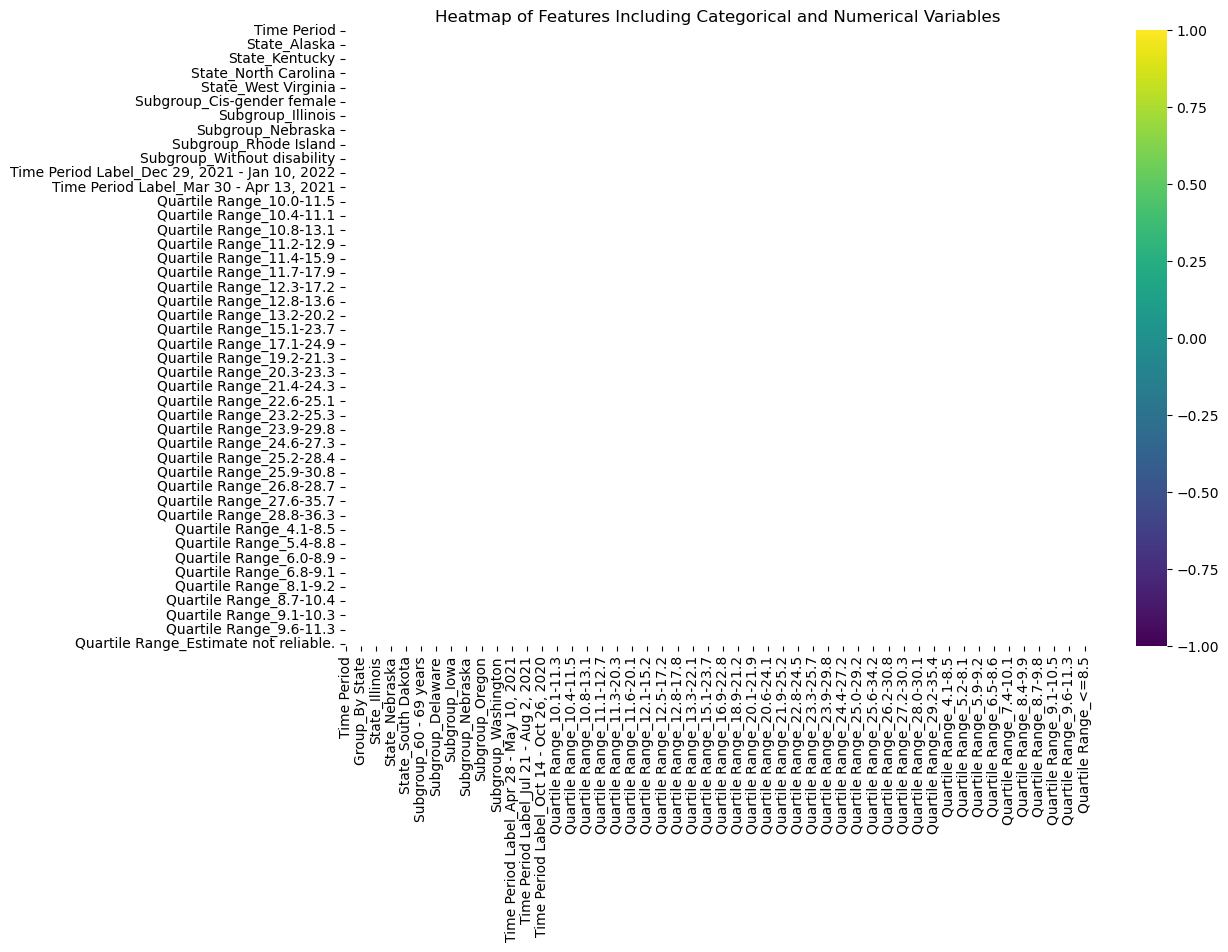

Text(0.5, 1.0, 'Heatmap')

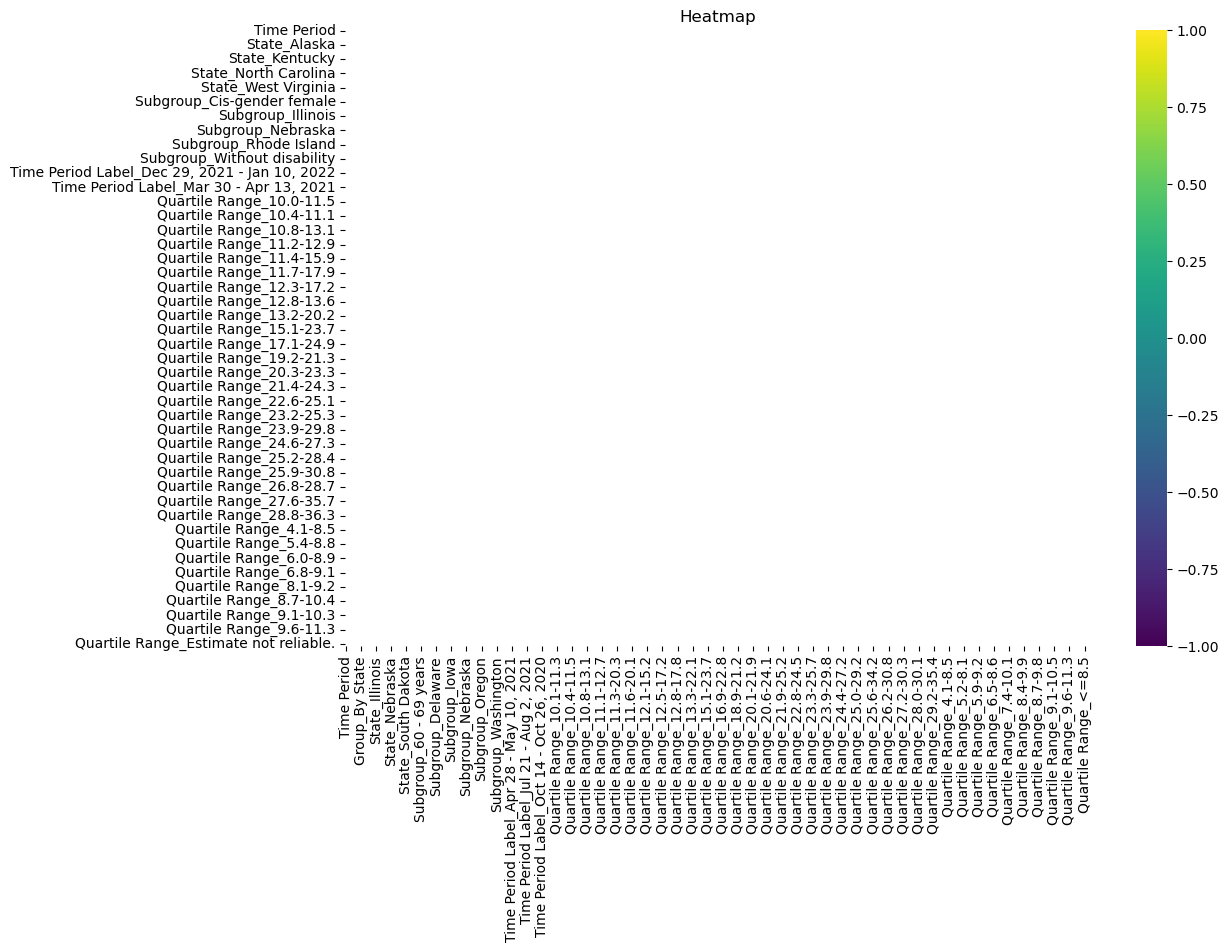

In [39]:
from sklearn.preprocessing import OneHotEncoder

# Separating categorical and numerical columns
cat_cols = data_reduced.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = data_reduced.select_dtypes(include=['number']).columns.tolist()

# Applying One-Hot Encode on Categorical Variables
data_encoded = pd.get_dummies(data_reduced, columns=cat_cols, drop_first=True)

# Checking for any column that has zero variance. If yes then drop it
data_encoded = data_encoded.loc[:, data_encoded.var() > 0]

# Compute the correlation matrix
corr_matrix = data_encoded.corr()

# Checking if the correlation matrix has valid (non-zero) values
if corr_matrix.isnull().values.all() or (corr_matrix == 0).all().all():
    print("The correlation matrix is empty or contains only zeroes.")
else:
    # Plot the heatmap with adjusted vmin, vmax
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=False, cmap='viridis', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
    plt.title("Heatmap of Features Including Categorical and Numerical Variables")
    plt.show()

# Computing the correlation matrix for numerical columns
corr_matrix = data_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title("Heatmap")

In [ ]:
sns.pairplot(data[['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period Label', 'Quartile Range', 'Time Period', 'Value', 'LowCI', 'HighCI', 'Usage_Category']])  # Replace 'x1', 'x2', 'x3' with actual feature columns
plt.show()